In [1]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel('AcousticFeatures_April16_AHI1_scaled.xlsx')
X = df.loc[:, 'shEnt':'PXX_diff_SMA'].values 
y = df['AHI'].values

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

y_true, y_pred = [], []
alpha = 0.1

for i, j in kf.split(X):
    X_train, X_test = X[i], X[j]
    y_train, y_test = y[i], y[j]

    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)

    yhat = model.predict(X_test)
    
    y_true.extend(y_test)
    y_pred.extend(yhat)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.494e+01, tolerance: 6.548e+00
  model = cd_fast.enet_coordinate_descent(


In [4]:
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
print("MSE:", mse)
print("R²:", r2)

MSE: 371.49915925585145
R²: 0.16758644914365362


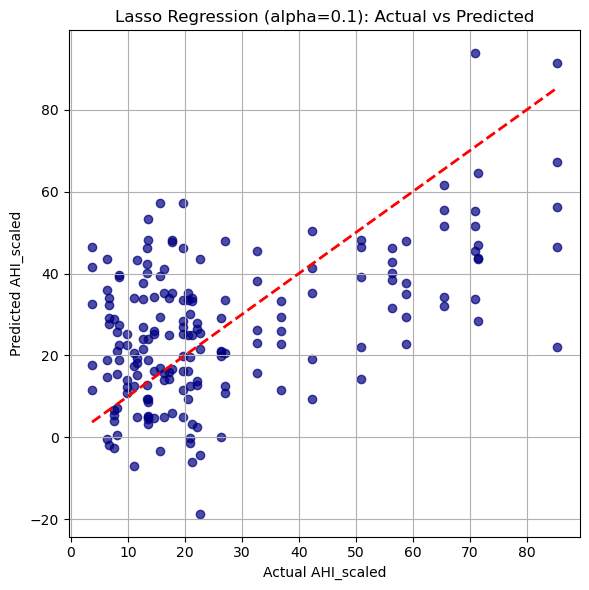

In [5]:
plt.figure(figsize=(6,6))
plt.scatter(y_true, y_pred, alpha=0.7, color='navy')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', linewidth=2)
plt.xlabel("Actual AHI_scaled")
plt.ylabel("Predicted AHI_scaled")
plt.title(f"Lasso Regression (alpha={alpha}): Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()